In [98]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [99]:
#Lendo a primeira linha

enem = open('MICRODADOS_ENEM_2018.csv')
line = enem.readline()
print(line)

NU_INSCRICAO;NU_ANO;CO_MUNICIPIO_RESIDENCIA;NO_MUNICIPIO_RESIDENCIA;CO_UF_RESIDENCIA;SG_UF_RESIDENCIA;NU_IDADE;TP_SEXO;TP_ESTADO_CIVIL;TP_COR_RACA;TP_NACIONALIDADE;CO_MUNICIPIO_NASCIMENTO;NO_MUNICIPIO_NASCIMENTO;CO_UF_NASCIMENTO;SG_UF_NASCIMENTO;TP_ST_CONCLUSAO;TP_ANO_CONCLUIU;TP_ESCOLA;TP_ENSINO;IN_TREINEIRO;CO_ESCOLA;CO_MUNICIPIO_ESC;NO_MUNICIPIO_ESC;CO_UF_ESC;SG_UF_ESC;TP_DEPENDENCIA_ADM_ESC;TP_LOCALIZACAO_ESC;TP_SIT_FUNC_ESC;IN_BAIXA_VISAO;IN_CEGUEIRA;IN_SURDEZ;IN_DEFICIENCIA_AUDITIVA;IN_SURDO_CEGUEIRA;IN_DEFICIENCIA_FISICA;IN_DEFICIENCIA_MENTAL;IN_DEFICIT_ATENCAO;IN_DISLEXIA;IN_DISCALCULIA;IN_AUTISMO;IN_VISAO_MONOCULAR;IN_OUTRA_DEF;IN_GESTANTE;IN_LACTANTE;IN_IDOSO;IN_ESTUDA_CLASSE_HOSPITALAR;IN_SEM_RECURSO;IN_BRAILLE;IN_AMPLIADA_24;IN_AMPLIADA_18;IN_LEDOR;IN_ACESSO;IN_TRANSCRICAO;IN_LIBRAS;IN_LEITURA_LABIAL;IN_MESA_CADEIRA_RODAS;IN_MESA_CADEIRA_SEPARADA;IN_APOIO_PERNA;IN_GUIA_INTERPRETE;IN_COMPUTADOR;IN_CADEIRA_ESPECIAL;IN_CADEIRA_CANHOTO;IN_CADEIRA_ACOLCHOADA;IN_PROVA_DEITADO;IN_

In [100]:
enem = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep =';', encoding='latin-1', usecols=['SG_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','TP_ESCOLA','NU_NOTA_MT','NU_NOTA_REDACAO'])

In [101]:
enem.head(10)

,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_MT,NU_NOTA_REDACAO
0,DF,M,1,2,NaN,NaN
1,MA,F,3,1,480.3,280.0
2,SP,F,1,1,NaN,NaN
3,BA,F,3,1,NaN,NaN
4,BA,M,0,2,NaN,360.0
5,PB,F,1,1,538.8,580.0
6,MG,F,1,1,NaN,NaN
7,PI,M,3,1,733.8,680.0
8,CE,M,3,2,459.0,340.0
9,MT,F,3,1,525.4,740.0


In [102]:
enem.columns = ['Estado','Sexo','Cor','Escola','Nota_Matematica','Nota_Redacao']

In [103]:
enem.head(10)

,Estado,Sexo,Cor,Escola,Nota_Matematica,Nota_Redacao
0,DF,M,1,2,NaN,NaN
1,MA,F,3,1,480.3,280.0
2,SP,F,1,1,NaN,NaN
3,BA,F,3,1,NaN,NaN
4,BA,M,0,2,NaN,360.0
5,PB,F,1,1,538.8,580.0
6,MG,F,1,1,NaN,NaN
7,PI,M,3,1,733.8,680.0
8,CE,M,3,2,459.0,340.0
9,MT,F,3,1,525.4,740.0


In [104]:
enem.groupby(['Estado']).mean().sort_values(by = 'Nota_Matematica')

,Cor,Escola,Nota_Matematica,Nota_Redacao
Estado,,,,
AC,2.593172,1.195951,498.301916,462.852441
AP,2.520257,1.217906,499.616916,462.437796
MA,2.459609,1.262146,500.875340,468.094936
AM,2.678769,1.302541,502.948113,456.942671
PA,2.570205,1.280581,506.199633,485.756832
TO,2.476471,1.259407,507.080703,471.637080
RO,2.416632,1.235875,508.381779,456.956861
PI,2.483616,1.313401,512.579818,488.728450
RR,2.655285,1.272863,514.882862,460.197842


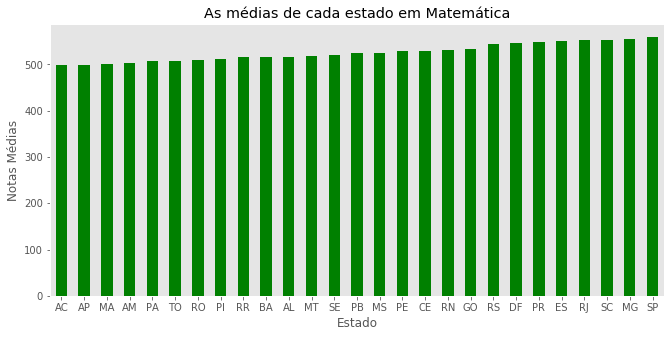

In [105]:
enemMat = enem.groupby(['Estado']).apply(lambda x: x['Nota_Matematica'].mean()).sort_values()
enemMat.plot(kind='bar', figsize=(11, 5), grid = False, rot=0, color='green')

plt.title('As médias de cada estado em Matemática')
plt.xlabel('Estado')
plt.ylabel('Notas Médias')
plt.show()

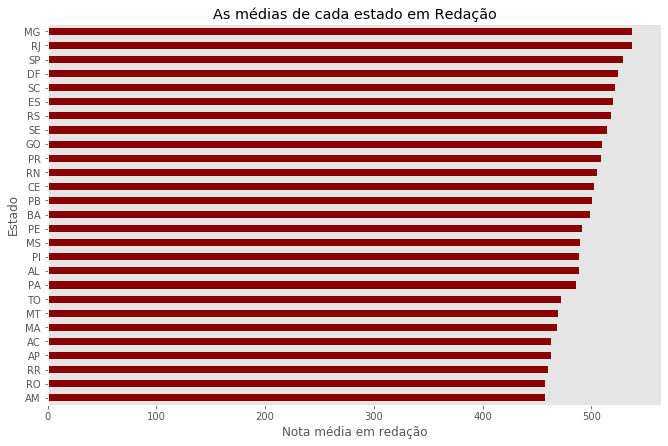

In [106]:
enemRed = enem.groupby(['Estado']).apply(lambda x: x['Nota_Redacao'].mean()).sort_values()
enemRed.plot(kind='barh', figsize=(11,7), grid=False, color='darkred', legend=False)

plt.title('As médias de cada estado em Redação')
plt.xlabel('Nota média em redação')
plt.show()

In [107]:
#Estados e suas médias de nota de matemática entre alunos de escola particular

enem2= enem.loc[(enem["Escola"]==2)]
enem2

enemPublica = enem2.groupby(['Estado']).apply(lambda x: x['Nota_Matematica'].mean())
enemPublica.sort_values()

Estado
MA    483.890241
PI    487.010931
AL    487.635459
AP    488.816054
TO    489.374085
PA    490.067282
AC    490.839071
AM    492.002750
SE    492.781300
BA    494.568707
MT    497.180456
PB    497.250891
RN    498.499899
RO    499.445890
RR    500.122039
CE    500.657973
MS    505.600858
GO    505.775350
PE    505.859580
RJ    511.288780
ES    516.253529
DF    517.246758
PR    517.949032
RS    522.142732
MG    526.069508
SC    526.550505
SP    527.190934
dtype: float64

In [108]:
#Estados e suas médias de nota de matemática entre alunos de escola publica

enem2= enem.loc[(enem["Escola"]==3)]
enem2

enemPrivado = enem2.groupby(['Estado']).apply(lambda x: x['Nota_Matematica'].mean())
enemPrivado.sort_values()

Estado
SE    441.425000
PI    459.284071
AC    462.892857
AM    463.741758
MA    471.318539
AL    472.071429
MT    477.316667
TO    479.100000
PA    479.718215
BA    480.476613
CE    485.523000
PB    491.145455
RR    494.300000
RO    494.454545
PE    497.003448
MS    501.914286
PR    502.196825
RN    502.415909
ES    512.310000
RS    524.345412
GO    524.957459
AP    529.966667
RJ    539.790684
SC    541.693953
SP    546.828655
MG    554.016602
DF           NaN
dtype: float64

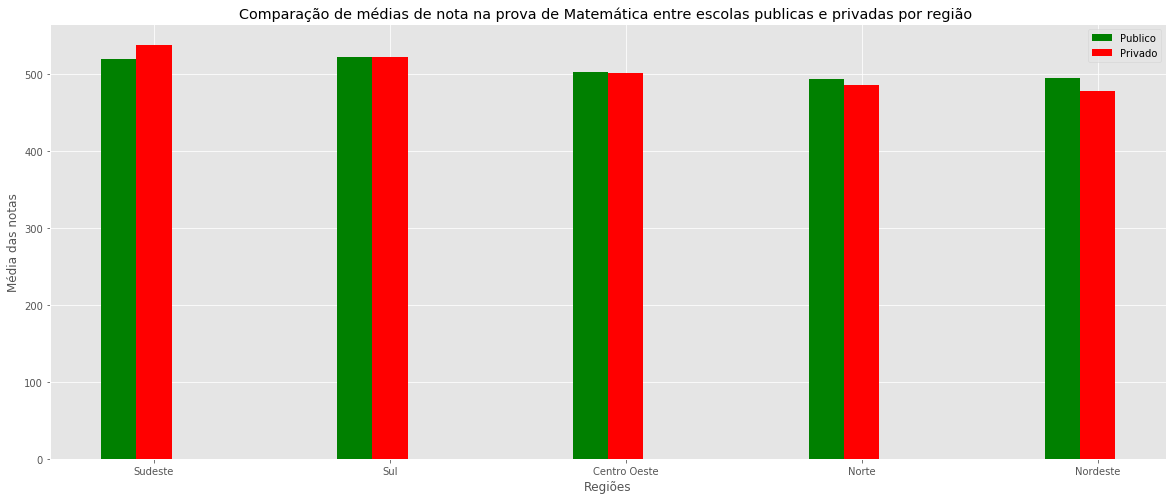

In [109]:
SudestePu = (enem.query('Estado == "SP" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "RJ" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "MG" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "ES" and Escola == 2')['Nota_Matematica'].mean())/4
SudestePa = (enem.query('Estado == "SP" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "RJ" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "MG" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "ES" and Escola == 3')['Nota_Matematica'].mean())/4

SulPu = (enem.query('Estado == "RS" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "SC" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "PR" and Escola == 2')['Nota_Matematica'].mean())/3
SulPa = (enem.query('Estado == "RS" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "SC" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "PR" and Escola == 3')['Nota_Matematica'].mean())/3

NordestePu = (enem.query('Estado == "AL" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "BA" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "CE" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "MA" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "PB" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "PE" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "PI" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "RN" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "SE" and Escola == 2')['Nota_Matematica'].mean())/9
NordestePa = (enem.query('Estado == "AL" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "BA" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "CE" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "MA" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "PB" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "PE" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "PI" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "RN" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "SE" and Escola == 3')['Nota_Matematica'].mean())/9

NortePu = (enem.query('Estado == "AM" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "RR" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "AP" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "PA" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "TO" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "RO" and Escola == 2')['Nota_Matematica'].mean()+ enem.query('Estado == "AC" and Escola == 2')['Nota_Matematica'].mean())/7
NortePa = (enem.query('Estado == "AM" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "RR" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "AP" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "PA" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "TO" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "RO" and Escola == 3')['Nota_Matematica'].mean()+ enem.query('Estado == "AC" and Escola == 3')['Nota_Matematica'].mean())/7

CoPu = (enem.query('Estado == "GO" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "MT" and Escola == 2')['Nota_Matematica'].mean() + enem.query('Estado == "MS" and Escola == 2')['Nota_Matematica'].mean())/3
CoPa = (enem.query('Estado == "GO" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "MT" and Escola == 3')['Nota_Matematica'].mean() + enem.query('Estado == "MS" and Escola == 3')['Nota_Matematica'].mean())/3


publico = [SudestePu, SulPu, CoPu, NortePu, NordestePu]
particular = [SudestePa, SulPa, CoPa, NortePa, NordestePa]

barWidth = 0.15
plt.figure(figsize = (20,8))

r1 = np.arange(len(publico))
r2 = [x+barWidth for x in r1]


plt.bar(r1, publico, color='green', width = barWidth, label = 'Publico')
plt.bar(r2, particular, color='red', width = barWidth, label = 'Privado')


plt.xlabel('Regiões')
plt.xticks([r + barWidth for r in range(len(publico))], ['Sudeste','Sul','Centro Oeste','Norte','Nordeste'])
plt.ylabel('Média das notas')
plt.title('Comparação de médias de nota na prova de Matemática entre escolas publicas e privadas por região ')

plt.legend()
plt.show()

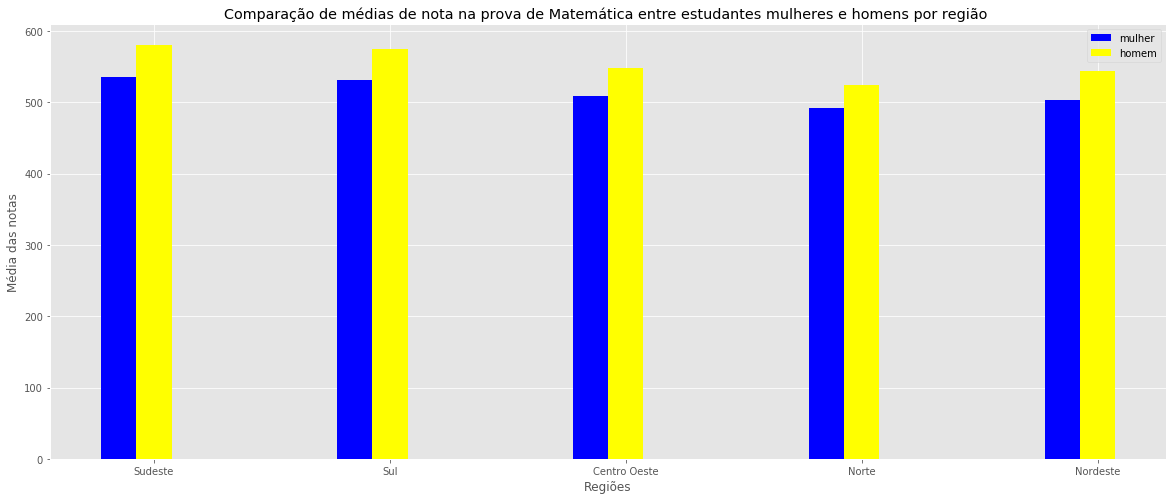

In [110]:
SudesteF = (enem.query('Estado == "SP" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "RJ" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "MG" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "ES" and Sexo == "F"')['Nota_Matematica'].mean())/4
SudesteH = (enem.query('Estado == "SP" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "RJ" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "MG" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "ES" and Sexo == "M"')['Nota_Matematica'].mean())/4

SulF = (enem.query('Estado == "RS" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "SC" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "PR" and Sexo == "F"')['Nota_Matematica'].mean())/3
SulH = (enem.query('Estado == "RS" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "SC" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "PR" and Sexo == "M"')['Nota_Matematica'].mean())/3

NordesteF = (enem.query('Estado == "AL" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "BA" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "CE" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "MA" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "PB" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "PE" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "PI" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "RN" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "SE" and Sexo == "F"')['Nota_Matematica'].mean())/9
NordesteH = (enem.query('Estado == "AL" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "BA" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "CE" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "MA" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "PB" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "PE" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "PI" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "RN" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "SE" and Sexo == "M"')['Nota_Matematica'].mean())/9

NorteF = (enem.query('Estado == "AM" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "RR" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "AP" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "PA" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "TO" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "RO" and Sexo == "F"')['Nota_Matematica'].mean()+ enem.query('Estado == "AC" and Sexo == "F"')['Nota_Matematica'].mean())/7
NorteH = (enem.query('Estado == "AM" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "RR" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "AP" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "PA" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "TO" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "RO" and Sexo == "M"')['Nota_Matematica'].mean()+ enem.query('Estado == "AC" and Sexo == "M"')['Nota_Matematica'].mean())/7

CoF = (enem.query('Estado == "GO" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "MT" and Sexo == "F"')['Nota_Matematica'].mean() + enem.query('Estado == "MS" and Sexo == "F"')['Nota_Matematica'].mean())/3
CoH = (enem.query('Estado == "GO" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "MT" and Sexo == "M"')['Nota_Matematica'].mean() + enem.query('Estado == "MS" and Sexo == "M"')['Nota_Matematica'].mean())/3

mulher = [SudesteF, SulF, CoF, NorteF, NordesteF]
homem = [SudesteH,SulH,CoH,NorteH, NordesteH]

barWidth = 0.15
plt.figure(figsize = (20,8))

r1 = np.arange(len(mulher))
r2 = [x+barWidth for x in r1]


plt.bar(r1, mulher, color='blue', width = barWidth, label = 'mulher')
plt.bar(r2, homem, color='yellow', width = barWidth, label = 'homem')


plt.xlabel('Regiões')
plt.xticks([r + barWidth for r in range(len(publico))], ['Sudeste','Sul','Centro Oeste','Norte','Nordeste'])
plt.ylabel('Média das notas')
plt.title('Comparação de médias de nota na prova de Matemática entre estudantes mulheres e homens por região ')

plt.legend()
plt.show()+



In [111]:
#Estados e suas médias de nota de matemática entre o sexo feminino

enem2= enem.loc[(enem["Sexo"]=='F')]
enem2

enemPublica = enem2.groupby(['Estado']).apply(lambda x: x['Nota_Matematica'].mean())
enemPublica.sort_values()

Estado
AC    485.660654
AP    486.940553
MA    487.281227
AM    489.553631
PA    492.437085
TO    493.326894
RO    495.362775
PI    496.516604
RR    500.196841
BA    500.322698
AL    500.831311
SE    502.340464
MT    503.525213
PB    505.089099
MS    508.283480
PE    511.866599
RN    512.459490
CE    512.540226
GO    515.771392
RS    526.500963
DF    526.663712
PR    530.975144
ES    532.203555
RJ    532.498283
SC    535.592081
MG    537.037964
SP    540.356221
dtype: float64

In [112]:
#Estados e suas médias de nota de matemática entre o sexo masculino

enem2= enem.loc[(enem["Sexo"]=='M')]
enem2

enemPublica = enem2.groupby(['Estado']).apply(lambda x: x['Nota_Matematica'].mean())
enemPublica.sort_values()

Estado
AC    515.850295
AP    517.191191
AM    520.693772
MA    521.266093
PA    526.899721
TO    527.329242
RO    527.921714
PI    535.562997
RR    537.746374
AL    539.203411
MT    539.525866
BA    541.582179
SE    546.442689
PB    548.568591
CE    550.074137
MS    550.168641
PE    552.399713
GO    555.771275
RN    557.691124
RS    571.048884
PR    571.754008
DF    572.021514
ES    574.702207
SC    579.789973
RJ    580.791915
MG    582.550188
SP    585.597646
dtype: float64

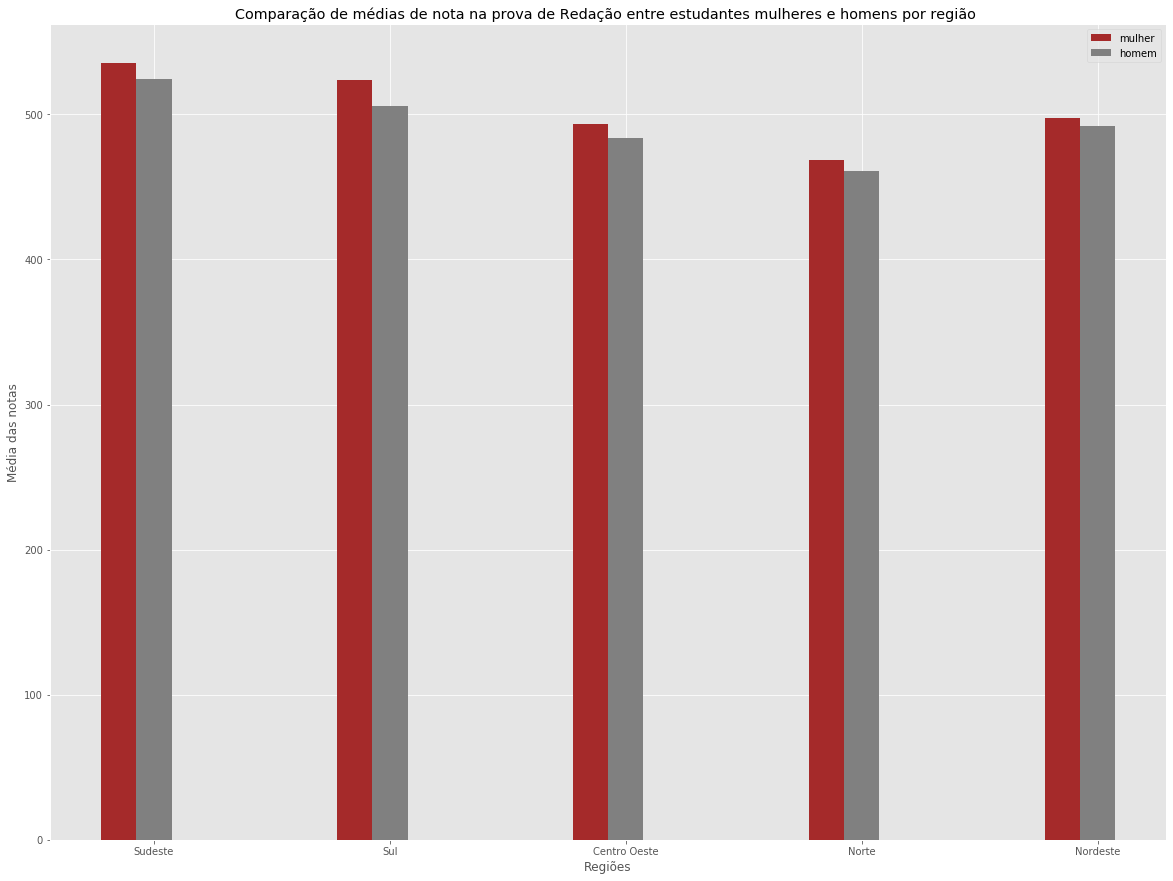

In [113]:
SudesteF = (enem.query('Estado == "SP" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "RJ" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "MG" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "ES" and Sexo == "F"')['Nota_Redacao'].mean())/4
SudesteH = (enem.query('Estado == "SP" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "RJ" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "MG" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "ES" and Sexo == "M"')['Nota_Redacao'].mean())/4

SulF = (enem.query('Estado == "RS" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "SC" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "PR" and Sexo == "F"')['Nota_Redacao'].mean())/3
SulH = (enem.query('Estado == "RS" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "SC" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "PR" and Sexo == "M"')['Nota_Redacao'].mean())/3

NordesteF = (enem.query('Estado == "AL" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "BA" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "CE" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "MA" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "PB" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "PE" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "PI" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "RN" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "SE" and Sexo == "F"')['Nota_Redacao'].mean())/9
NordesteH = (enem.query('Estado == "AL" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "BA" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "CE" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "MA" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "PB" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "PE" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "PI" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "RN" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "SE" and Sexo == "M"')['Nota_Redacao'].mean())/9

NorteF = (enem.query('Estado == "AM" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "RR" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "AP" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "PA" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "TO" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "RO" and Sexo == "F"')['Nota_Redacao'].mean()+ enem.query('Estado == "AC" and Sexo == "F"')['Nota_Redacao'].mean())/7
NorteH = (enem.query('Estado == "AM" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "RR" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "AP" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "PA" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "TO" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "RO" and Sexo == "M"')['Nota_Redacao'].mean()+ enem.query('Estado == "AC" and Sexo == "M"')['Nota_Redacao'].mean())/7

CoF = (enem.query('Estado == "GO" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "MT" and Sexo == "F"')['Nota_Redacao'].mean() + enem.query('Estado == "MS" and Sexo == "F"')['Nota_Redacao'].mean())/3
CoH = (enem.query('Estado == "GO" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "MT" and Sexo == "M"')['Nota_Redacao'].mean() + enem.query('Estado == "MS" and Sexo == "M"')['Nota_Redacao'].mean())/3

mulher = [SudesteF, SulF, CoF, NorteF, NordesteF]
homem = [SudesteH,SulH,CoH,NorteH, NordesteH]

barWidth = 0.15
plt.figure(figsize = (20,15))

r1 = np.arange(len(mulher))
r2 = [x+barWidth for x in r1]


plt.bar(r1, mulher, color='brown', width = barWidth, label = 'mulher')
plt.bar(r2, homem, color='gray', width = barWidth, label = 'homem')


plt.xlabel('Regiões')
plt.xticks([r + barWidth for r in range(len(publico))], ['Sudeste','Sul','Centro Oeste','Norte','Nordeste'])
plt.ylabel('Média das notas')
plt.title('Comparação de médias de nota na prova de Redação entre estudantes mulheres e homens por região ')

plt.legend()
plt.show()

In [114]:
enem = open('MICRODADOS_ENEM_2015.csv')
line = enem.readline()
print(line)

NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,IN_ESTUDA_CLASSE_HOSPITALAR,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NU_IDADE,TP_SEXO,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_ESTADO_CIVIL,TP_COR_RACA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_SABATISTA,IN_OUTRA_DEF,IN_SEM_RECURSO,IN_NOME_SOCIAL,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CAD

In [115]:
enem15 = pd.read_csv('MICRODADOS_ENEM_2015.csv', sep =',', encoding='latin-1', usecols=['SG_UF_RESIDENCIA','NU_NOTA_MT'])
enem15.columns = ['Estado','Nota_Matematica']


In [116]:
Sudeste = (enem.query('Estado == "SP"')['Nota_Matematica'].mean() + enem.query('Estado == "RJ"')['Nota_Matematica'].mean() + enem.query('Estado == "MG"')['Nota_Matematica'].mean() + enem.query('Estado == "ES"')['Nota_Matematica'].mean())/4
Sudeste15 = (enem.query('Estado == "SP"')['Nota_Matematica'].mean() + enem.query('Estado == "RJ"')['Nota_Matematica'].mean() + enem.query('Estado == "MG"')['Nota_Matematica'].mean() + enem.query('Estado == "ES"')['Nota_Matematica'].mean())/4

Sul = (enem.query('Estado == "RS"')['Nota_Matematica'].mean() + enem.query('Estado == "SC"')['Nota_Matematica'].mean() + enem.query('Estado == "PR"')['Nota_Matematica'].mean())/3
Sul15 = (enem.query('Estado == "RS"')['Nota_Matematica'].mean() + enem.query('Estado == "SC"')['Nota_Matematica'].mean() + enem.query('Estado == "PR"')['Nota_Matematica'].mean())/3

Nordeste = (enem.query('Estado == "AL"')['Nota_Matematica'].mean() + enem.query('Estado == "BA"')['Nota_Matematica'].mean() + enem.query('Estado == "CE"')['Nota_Matematica'].mean()+ enem.query('Estado == "MA"')['Nota_Matematica'].mean()+ enem.query('Estado == "PB"')['Nota_Matematica'].mean()+ enem.query('Estado == "PE"')['Nota_Matematica'].mean()+ enem.query('Estado == "PI"')['Nota_Matematica'].mean()+ enem.query('Estado == "RN"')['Nota_Matematica'].mean()+ enem.query('Estado == "SE"')['Nota_Matematica'].mean())/9
Nordeste15 = (enem.query('Estado == "AL"')['Nota_Matematica'].mean() + enem.query('Estado == "BA"')['Nota_Matematica'].mean() + enem.query('Estado == "CE"')['Nota_Matematica'].mean()+ enem.query('Estado == "MA"')['Nota_Matematica'].mean()+ enem.query('Estado == "PB"')['Nota_Matematica'].mean()+ enem.query('Estado == "PE"')['Nota_Matematica'].mean()+ enem.query('Estado == "PI"')['Nota_Matematica'].mean()+ enem.query('Estado == "RN"')['Nota_Matematica'].mean()+ enem.query('Estado == "SE"')['Nota_Matematica'].mean())/9

Norte = (enem.query('Estado == "AM"')['Nota_Matematica'].mean() + enem.query('Estado == "RR"')['Nota_Matematica'].mean() + enem.query('Estado == "AP"')['Nota_Matematica'].mean()+ enem.query('Estado == "PA"')['Nota_Matematica'].mean()+ enem.query('Estado == "TO"')['Nota_Matematica'].mean()+ enem.query('Estado == "RO"')['Nota_Matematica'].mean()+ enem.query('Estado == "AC"')['Nota_Matematica'].mean())/7
Norte15 = (enem.query('Estado == "AM"')['Nota_Matematica'].mean() + enem.query('Estado == "RR"')['Nota_Matematica'].mean() + enem.query('Estado == "AP"')['Nota_Matematica'].mean()+ enem.query('Estado == "PA"')['Nota_Matematica'].mean()+ enem.query('Estado == "TO"')['Nota_Matematica'].mean()+ enem.query('Estado == "RO"')['Nota_Matematica'].mean()+ enem.query('Estado == "AC"')['Nota_Matematica'].mean())/7

Co = (enem.query('Estado == "GO"')['Nota_Matematica'].mean() + enem.query('Estado == "MT"')['Nota_Matematica'].mean() + enem.query('Estado == "MS"')['Nota_Matematica'].mean())/3
Co15 = (enem.query('Estado == "GO"')['Nota_Matematica'].mean() + enem.query('Estado == "MT"')['Nota_Matematica'].mean() + enem.query('Estado == "MS"')['Nota_Matematica'].mean())/3

ano2018 = [Sudeste, Sul, Co, Norte, Nordeste]
ano2015 = [Sudeste15,Sul15,Co15,Norte15, Nordeste15]

barWidth = 0.15
plt.figure(figsize = (20,15))

r1 = np.arange(len(ano2018))
r2 = [x+barWidth for x in r1]


plt.bar(r1, ano2018, color='brown', width = barWidth, label = 'ano2018')
plt.bar(r2, ano2015, color='gray', width = barWidth, label = 'ano2015')


plt.xlabel('Regiões')
plt.xticks([r + barWidth for r in range(len(ano2018))], ['Sudeste','Sul','Centro Oeste','Norte','Nordeste'])
plt.ylabel('Média das notas')
plt.title('Comparação de médias de nota na prova de Redação entre estudantes mulheres e homens por região ')

plt.legend()
plt.show()




AttributeError: '_io.TextIOWrapper' object has no attribute 'query'